In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
def LR_cost_function(alpha, beta, x, y):
    '''Return the cost for a given line and data.
    
    Alpha and beta are the coeficients that describe the fit line, while
    x and y are lists or arrays with the x and y value of each data point.
    '''
    error=0
    n=len(x)
    for i in range(n):
        point_error = (y[i] - (alpha + beta * x[i]))
        error += point_error
    return error / n

In [6]:
def step (alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current function to a new, more optimal one'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        point_alpha = -(2/n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        point_beta = -(2/n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
    new_alpha = alpha_cur - learning_rate*alpha
    new_beta = beta_cur - learning_rate*beta
    return [new_alpha, new_beta]

In [7]:
stop=1000
learning_rate = .005
alpha_start = 0
beta_start = 0

x = np.random.normal(0,1,100)
y = x * 2 + np.random.sample(100)

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), y.reshape(-1,1))
print("Coefficients from sklearn:\n", regr.coef_)
print("\nIntercept from sklearn: \n", regr.intercept_)

Coefficients from sklearn:
 [[2.04016128]]

Intercept from sklearn: 
 [0.50232197]


Coefficients from gradient descent algorithm: 
 2.024719828821007

Intercept from gradient descent algorithm: 
 2.024719828821007


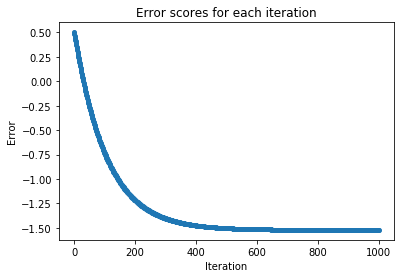

In [8]:
all_error = []

alpha = alpha_start
beta = beta_start

for iter in range(stop):
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    error = LR_cost_function(alpha, beta, x, y)
    all_error.append(error)
    
print("Coefficients from gradient descent algorithm: \n", beta)
print("\nIntercept from gradient descent algorithm: \n", alpha)

plt.plot(all_error, "o", ms=4)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Error scores for each iteration")
plt.show()